In [1]:
%load_ext autoreload
%autoreload 2

import os, pickle, random, sbmtm
# import seaborn as sns; sns.set(style="white", color_codes=True) # is not installed on system, just folder in this directory
import numpy as np
import pandas as pd
from sbmtm import sbmtm
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

In [2]:
path_read = 'cleaned_posts/'
fname_read = '10149142-the-family-fang.json'
filename = os.path.join(path_read,fname_read)
print(filename)

cleaned_posts/10149142-the-family-fang.json


In [3]:
with open(filename,"r",encoding="utf8") as f:
    df = pd.DataFrame(pd.read_json(f))

In [5]:
df.head()

,doc,score,ups,delta,removed_words,name,raw_text,affect,posemo,negemo,anx,anger,sad,word_count
1,"[fun, read, book, actually, finish, book, disn...",5,0,-338,"[something, or, , so, it, put, up, will, the,...",ehicifj.json,i had so much fun reading this book i actuall...,9,7,2,0,0,1,54
10,"[definitely, question, sanity, give, 5, star, ...",5,0,276,"[ , so, one, someone, well, for, did, the, why...",ffcfabb.json,this is definitely one where i question my sa...,15,5,10,2,3,4,62
100,"[weird, story, hard, time, get, initially, wei...",4,0,-18,"[would, some, many, so, it, for, did, take, in...",aehibdf.json,such a weird story and i had a hard time getti...,7,3,4,0,0,0,50
1000,"[quirky, bizarre, thoroughly, think, provoke, ...",5,0,20,"[yet, was, with, out, two, i, the, made, to, a...",dgbjajh.json,such a quirky and bizarre yet thoroughly thoug...,1,0,1,0,0,0,25
1001,"[like, dysfunctional, family, story, devotion,...",3,0,-292,"[was, except, the, to, although, is, that, les...",bibdjih.json,i mostly liked this dysfunctional family story...,4,3,1,1,0,0,18


In [7]:
from collections import Counter
def count_tokens(df):
    token_counts = Counter()
    for indx, record in df.iterrows():
        token_counts.update(record["doc"])
    
    return token_counts

def removeall_replace(doc, stoplist):
    t = [word for word in doc if word not in stoplist]
    del doc[:]
    doc.extend(t)

def remove_custom_stoplist(df,stoplist):
    for indx, record in df.iterrows():
        removeall_replace(record["doc"],stoplist)
        
token_counts = count_tokens(df)
print([(i,j) for i,j in token_counts.items() if j > 500])

[('read', 1440), ('book', 3743), ('story', 977), ('art', 1982), ('performance', 1095), ('fang', 1955), ('child', 2520), ('family', 1985), ('think', 715), ('time', 508), ('wilson', 652), ('caleb', 975), ('camille', 932), ('not', 1313), ('like', 1031), ('parent', 2412), ('kid', 633), ('novel', 575), ('find', 527), ('end', 506), ('love', 669), ('artist', 874), ('annie', 1459), ('buster', 1507), ('life', 548), ('character', 1006), ('good', 601)]


In [8]:
custom_stoplist = ["way","not","read","story","think","like","book","novel","good"]
remove_custom_stoplist(df,custom_stoplist)

In [4]:
m_min = 100 ## minimum text length
df = df[df['word_count']>=m_min]

list_texts = list(df['doc'])
list_titles = list(df.index) # list_titles
list_dt = list(df['delta'])

Text(0,0.5,'# books lenth >= m')

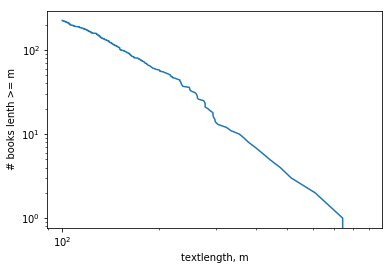

In [5]:
list_m = [len(text) for text in list_texts]
N = len(list_texts)
x = np.sort(list_m)
y = (np.arange(N)+1)

plt.plot(x,N-y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('textlength, m')
plt.ylabel('# books lenth >= m')

In [6]:
model = sbmtm()
model.make_graph(list_texts,documents=list_titles)

Reached 0th node


In [33]:
model.fit(min_blocks=3)

In [14]:
model.topics(l=1)

{0: [('novel', 0.10221285563751317),
  ('quirky', 0.0547945205479452),
  ('mall', 0.0410958904109589),
  ('dysfunctional', 0.0368809272918862),
  ('see', 0.03477344573234984),
  ('refer', 0.032665964172813484),
  ('project', 0.02528977871443625),
  ('include', 0.022128556375131718),
  ('happy', 0.02107481559536354),
  ('level', 0.018967334035827187)],
 1: [('fang', 0.0900232018561485),
  ('family', 0.08306264501160093),
  ('performance', 0.07610208816705337),
  ('artist', 0.06774941995359629),
  ('create', 0.04176334106728538),
  ('piece', 0.03990719257540603),
  ('live', 0.03897911832946636),
  ('have', 0.03619489559164733),
  ('great', 0.02923433874709977),
  ('world', 0.028306264501160094)],
 2: [('art', 0.18457300275482094),
  ('parent', 0.1790633608815427),
  ('life', 0.11937557392102846),
  ('grow', 0.07713498622589532),
  ('childhood', 0.05693296602387511),
  ('public', 0.04224058769513315),
  ('force', 0.03673094582185491),
  ('raise', 0.03305785123966942),
  ('prop', 0.0293847

In [35]:

for i in range(model.L):
    print(i, len(model.topics(l=i)))

0 43
1 7
2 3


In [11]:
chosen_level = 1 

doc_groups: 7 word-groups: 9


Text(0,0.5,'fraction of posts in doc-group')

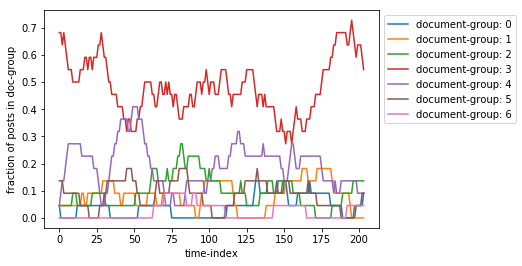

In [66]:
## group membership of doc-, and word-nodes
p_td_d,p_tw_w = model.group_membership(l=chosen_level)

D = model.get_D() ## number of documents
B_d = len(p_td_d[:,0]) ## number of doc-groups
B_w = len(p_tw_w[:,0]) ## number of word-groups

print("doc_groups:",B_d, "word-groups:",B_w)

## sort docs according to time-stamp
indsort = np.argsort(list_dt)
p_td_d_sort = p_td_d[:,indsort]

## measure fraction of docs in each doc-group in a running window of length s
s = int(D/10) ## running window with s posts
arr_t_s = np.zeros((B_d,D-s))

topic_freqs = []
for i in range(D-s):
    arr_t_s[:,i] = np.mean(p_td_d_sort[:,i:i+s],axis=1)
    topic_freqs.append(list(arr_t_s[:,i]))

#print(arr_t_s)

#print(topic_freqs)
## plot
for t_w in range(B_d):
    plt.plot(arr_t_s[t_w,:],label='document-group: %s'%(t_w))
plt.legend(bbox_to_anchor=(1,1))

plt.xlabel('time-index')
plt.ylabel('fraction of posts in doc-group')


In [27]:
def calc_HHI(topic_concentrations):
    HHI = []
    for time_slice in topic_concentrations:
        HHI.append(sum([i**2 for i in time_slice if i < .18]))
    return HHI
    

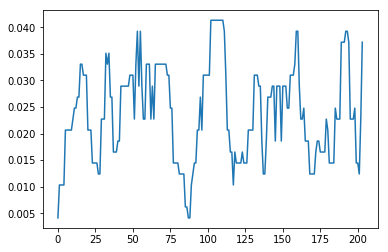

In [22]:
values = calc_HHI(topic_freqs)
plt.clf()
plt.plot(values)

In [18]:
values

[[0.0,
  0.8264462809917354,
  0.0,
  0.0,
  0.002066115702479339,
  0.002066115702479339,
  0.0],
 [0.0,
  0.7458677685950413,
  0.0,
  0.0,
  0.008264462809917356,
  0.002066115702479339,
  0.0],
 [0.0,
  0.7458677685950413,
  0.0,
  0.0,
  0.008264462809917356,
  0.002066115702479339,
  0.0],
 [0.0,
  0.7458677685950413,
  0.0,
  0.0,
  0.008264462809917356,
  0.002066115702479339,
  0.0],
 [0.0,
  0.7458677685950413,
  0.0,
  0.0,
  0.008264462809917356,
  0.002066115702479339,
  0.0],
 [0.0,
  0.6694214876033059,
  0.0,
  0.0,
  0.018595041322314047,
  0.002066115702479339,
  0.0],
 [0.0,
  0.6694214876033059,
  0.0,
  0.0,
  0.018595041322314047,
  0.002066115702479339,
  0.0],
 [0.0,
  0.6694214876033059,
  0.0,
  0.0,
  0.018595041322314047,
  0.002066115702479339,
  0.0],
 [0.0,
  0.6694214876033059,
  0.0,
  0.0,
  0.018595041322314047,
  0.002066115702479339,
  0.0],
 [0.0,
  0.6694214876033059,
  0.0,
  0.0,
  0.018595041322314047,
  0.002066115702479339,
  0.0],
 [0.0,
  0

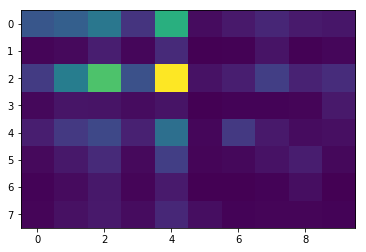

In [22]:
## fraction of tokens from doc-group td to word-group tw
p_td_tw = model.group_to_group_mixture(l=chosen_level)
plt.imshow(p_td_tw,aspect='auto')



In [ ]:
# Each row sums to 1?

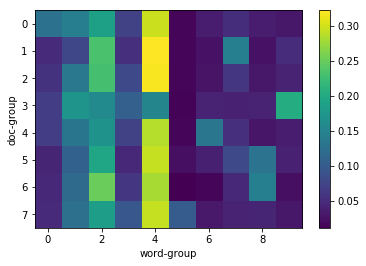

In [23]:
## conditional probability p(tw | td)
p_tw_cond_td = p_td_tw.T/np.sum(p_td_tw,axis=1)[np.newaxis,:]#[:,np.newaxis]
plt.imshow(p_tw_cond_td.T,aspect='auto')
plt.ylabel('doc-group')
plt.xlabel('word-group')
plt.colorbar()

In [24]:
## How much does each document group load on particular topics?
result = model.get_groups(l=chosen_level)

In [25]:
p_tw_d = result['p_tw_d']

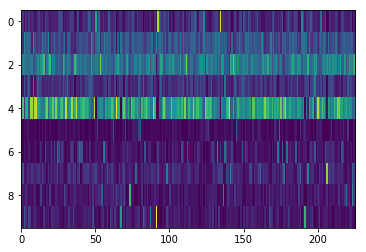

In [26]:
plt.imshow(p_tw_d,aspect='auto')

In [ ]:
model


In [98]:
model.fit(min_blocks=3)

In [99]:
for i in range(model.L):
    print(i, len(model.topics(l=i)))
    

0 23
1 5
2 2


In [103]:
chosen_level = 1

In [104]:
## how much each word-topic loads into each document
## group membership of doc-, and word-nodes
p_td_d,p_tw_w = model.group_membership(l=chosen_level)

D = model.get_D() ## number of documents
B_d = len(p_td_d[:,0]) ## number of doc-groups
B_w = len(p_tw_w[:,0]) ## number of word-groups

D = model.get_D()
B_w = len(p_tw_w[:,0])
p_tw_d = np.zeros(( B_w,D ))
for i in range(D):
    p_tw_d[:,i] = [ h[1] for h in model.topicdist(i,l=chosen_level) ]
    
indsort = np.argsort(list_dt)
p_tw_d = p_tw_d[:,indsort]

# indsort = np.argsort(list_dt)
# plt.imshow(p_td_w,aspect='auto',vmin=0,vmax=1)
# plt.imshow(p_td_w,aspect='auto',vmin=0,vmax=1)

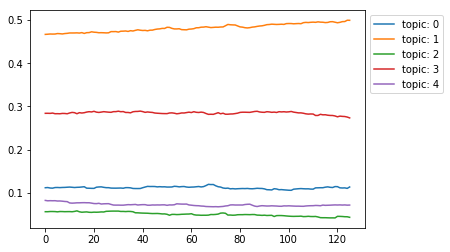

In [105]:
s = 100 ## running window with s posts
arr_t_s = np.zeros((B_w,D-s))
topic_freqs = []
for i in range(D-s):
    arr_t_s[:,i] = np.mean(p_tw_d[:,i:i+s],axis=1)
    topic_freqs.append(arr_t_s[:,i])

for t_w in range(B_w):
    if t_w not in []:
        plt.plot(arr_t_s[t_w,:],label='topic: %s'%(t_w))
plt.legend(bbox_to_anchor=(1,1))

In [106]:
def calc_HHI(topic_concentrations, withhold):
    HHI = []
    for time_slice in topic_concentrations:
        HHI.append(sum([j**2 for i,j in enumerate(time_slice) if i not in withhold]))
    return HHI

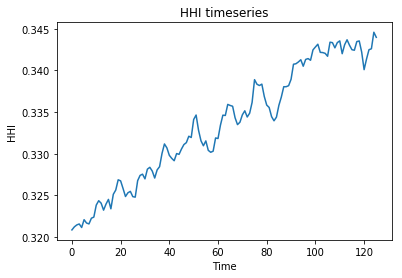

In [107]:
values = calc_HHI(topic_freqs,[])
plt.plot(values)
plt.xlabel("Time")
plt.ylabel("HHI")
plt.title("HHI timeseries")
plt.savefig("trial_{}.png".format(inc),dpi=300)
inc +=1

In [109]:
 pos,t,tpos = model.state.draw(layout="bipartite",
                                              output_size=(1000, 1000),
                                              output="trial_graph.png",
                                              hshortcuts=1,
                                              hide=0)

In [ ]:
def top_level_words(model):
    
    tl_list = []
    top_level = model.L - 1
    for top in (model.topics(l=top_level)).values():
        tl_list+= [i for i,j in top]
    
    return list(set(tl_list))
    
    

In [ ]:
def find_top_doc_loading(model, topic_number):
    max_weight = 0
    max_ind = None
    for doc_ind in range(model.get_D()):
        top, weight = model.topicdist(doc_ind)[topic_number]
        if top == topic_number and weight > max_weight:
            max_weight = weight
            max_ind = doc_ind
    
    
    trimmed = [(top, weight) for top, weight in model.topicdist(max_ind) if weight != 0]
        
    return (max_ind,trimmed)
    

In [ ]:
find_top_doc_loading(model,1)

In [ ]:
model.topics(l=0)[1]

In [ ]:
model.documents[404]

In [ ]:
df.loc[2098]["raw_text"]